In [1]:
import pandas as pd
from pathlib import Path

In [2]:
result_path = Path().resolve().parent / "result" 
df= pd.read_csv(result_path / "results.csv")

In [3]:
# Model-wise accuracy (original questions)
print("Original Question Accuracy:")
print(df[["llama_original_correct", "qwen_original_correct", "mistral_original_correct"]].mean())

# Model-wise accuracy (paraphrased questions)
print("\nParaphrased Question Accuracy:")
print(df[["llama_para_correct", "qwen_para_correct", "mistral_para_correct"]].mean())

# Overall full-match accuracy
overall_accuracy = df["all_models_correct"].mean()
print(f"\nAll Models Correct (Both Original + Paraphrased): {overall_accuracy:.2%}")


Original Question Accuracy:
llama_original_correct      0.507692
qwen_original_correct       0.584615
mistral_original_correct    0.361538
dtype: float64

Paraphrased Question Accuracy:
llama_para_correct      0.419231
qwen_para_correct       0.523077
mistral_para_correct    0.265385
dtype: float64

All Models Correct (Both Original + Paraphrased): 16.15%


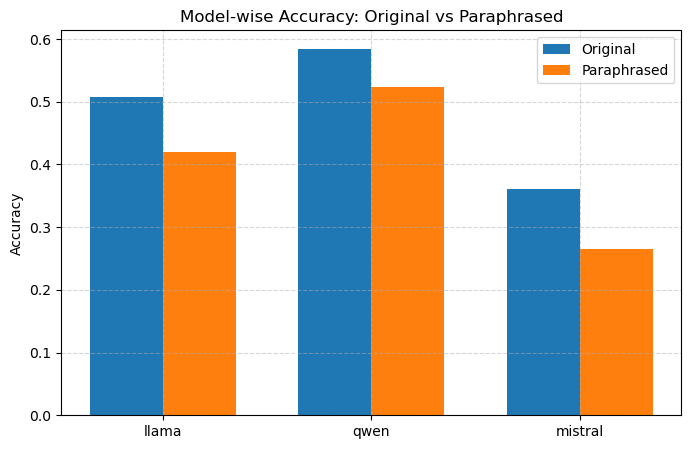

In [4]:
import matplotlib.pyplot as plt

model_names = ["llama", "qwen", "mistral"]

original_acc = df[[f"{m}_original_correct" for m in model_names]].mean()
paraphrased_acc = df[[f"{m}_para_correct" for m in model_names]].mean()

x = range(len(model_names))
width = 0.35

plt.figure(figsize=(8, 5))
plt.bar(x, original_acc, width=width, label="Original", align='center')
plt.bar([i + width for i in x], paraphrased_acc, width=width, label="Paraphrased", align='center')

plt.xticks([i + width/2 for i in x], model_names)
plt.ylabel("Accuracy")
plt.title("Model-wise Accuracy: Original vs Paraphrased")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


In [5]:
# Rows where any model failed
failures = df[df["all_models_correct"] == 0]

# Show a few example failures
failures[[
    "db_name", "natural_language", "paraphrased_nl", "paraphrased_score",
    "llama_original_correct", "llama_para_correct",
    "qwen_original_correct", "qwen_para_correct",
    "mistral_original_correct", "mistral_para_correct"
]].head(10)


,db_name,natural_language,paraphrased_nl,paraphrased_score,llama_original_correct,llama_para_correct,qwen_original_correct,qwen_para_correct,mistral_original_correct,mistral_para_correct
0,college_2,Which instructors from the Cybernetics departm...,What instructors in the Cybernetics department...,1.0,True,True,True,True,False,False
1,college_2,What are the course IDs and titles of courses ...,What are the course IDs and titles of the cour...,1.0,False,False,False,False,False,False
2,mountain_photos,What are the names and heights of mountains lo...,What are the mountain names and their respecti...,1.0,True,True,True,True,False,False
4,hr_1,Which countries are located in the region with...,What regions do countries belong to where the ...,1.0,True,False,True,False,True,False
5,hr_1,"Which employees have a salary greater than 17,...",What employees earn a wage exceeding seventeen...,1.0,False,False,False,False,False,False
6,hospital_1,Who are the physicians with the position of Su...,What are the names of the physicians who hold ...,1.0,True,True,True,True,False,True
7,hospital_1,Which departments have a primary affiliation a...,What departments are primarily affiliated with...,1.0,False,False,False,False,True,True
8,store_1,What is the name of the artist with the ID of 1?,What artist do we have with an ID of 1?,1.0,True,False,True,True,True,True
9,store_1,What are the titles of the albums by the artis...,What albums does the artist with the ID of 2 h...,1.0,True,False,True,True,True,True
10,medicine_enzyme_interaction,"Which medicines are FDA approved, and what are...",What are the names of the medicines that have ...,1.0,False,False,False,False,False,False
